# Introduction

Ce notebook présente les travaux mnés dans le cadre du cours de finance durable au sein du Mastère en Optimisation des Systèmes Energétiques.
L'objectif de ce projet est d'étudier plusieurs stratégies d'optimisation d'un portefeuille d'actifs issus du S&P500.
En plus d'implémenter des différents modèles d'optimisation, l'objectif de ce projet sera également de calculer différents indicateurs utilisés dans le secteur d'asset management.
Au-delà de mettre en place des stratégies d'optimisation et d'anlayser leurs différentes metrics, le but de ce travail est également d'intégrer des contraintes/ des pénalités d'empreinte carbone associé à chacun de nos actifs pour analyser l'impact qu'elles ont sur le rendement, le risque ainsi que d'autres métrics permettant d'anlayser la performance des portefeuilles. 

Ce notebook est divisé en 6 parties si nous excluons l'introduction ci-dessus. 
La première traite de la sélection des actifs qui seront intégrés dans les différents portefeuilles étudiés
La seconde partie de se notebook présente les différents modèles d'optimisation et les choix d'implémentation retenus pour le projet. 
Dans la troisième partie une analyse des indicateurs permettant de quantifier la performance des portefeuilles sera mené. 
Dans un quatrième temps nous relancerons de nouvelles optimisation mais cette fois-ci en intégrant des pénalités d'empreintes carbone.
Nous conduirons dans la cinquième partie une nouvelle analyse comparable à celle conduite dans la partie 3 pour comprendre l'impact des pénalités carbone sur les performances du portefeuilles.
Nous finirons ensuite par conclure notre étude en menant une réflexion sur l'ensemble du travail qui a été mené.



# Sélection des actifs

## Le jeu de données

Le jeu de données dont nous disposons contient les actifs S&P500

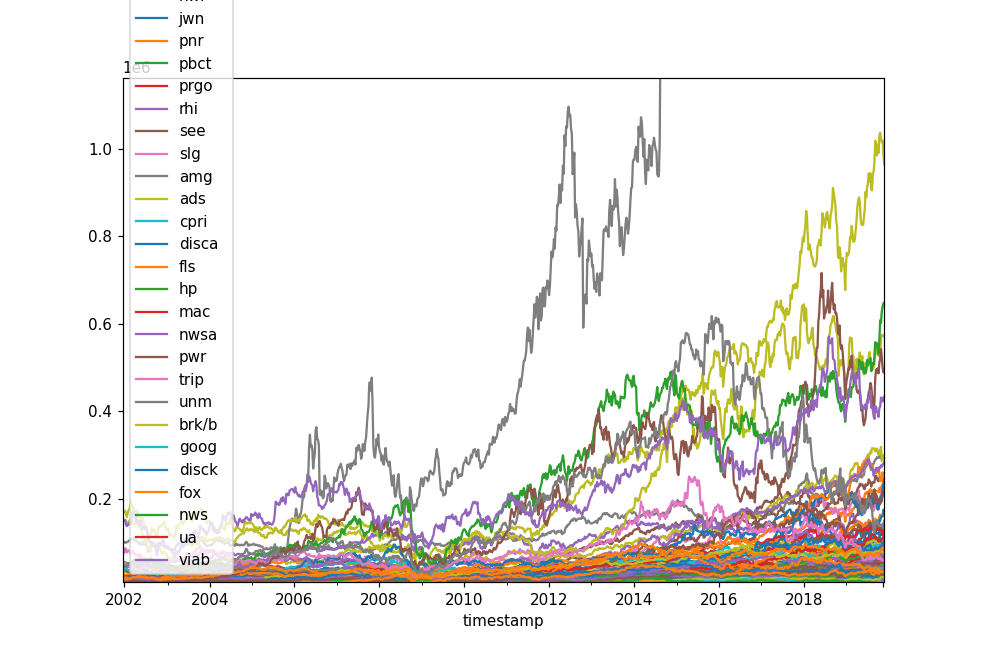

Dans la mesure où tous les actifs disponibles ne sont disponible depuis le début du dataset, nous avons procédé à un choix de début d'année d'analyse avant de conduite toute analyse et sélection. 

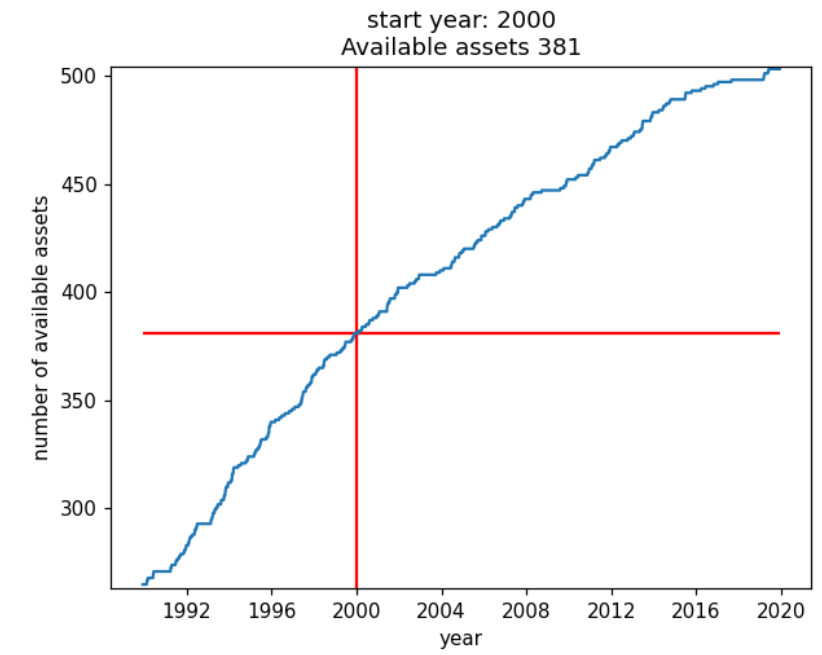

Voici ci-dessous un graphique représentant les assets disponibles dans notre dataset initial en fonction de l'année. Nous avons décidé de choisir l'année 2000 comme début de l'analyse. Nous remarquons que nous avons 381 actifs existants lors de cette année. 

C'est sur la base de ces 381 actifs que nous appliquerons nos programmes d'optimisation et l'analyse.

A la suite de cette sélection, nous avons chosi 50 actifs issus des 10 secteurs du S&P500. Nous avons donc choisi pour chacun des 10 secteurs les 5 actifs avec la carbon footprint la plus faible.

# Présentation des modèles d'optimisation

Nous proposons ici de présenter les modèles d'optimisations suivants qui ont été appliqués aux 50 actifs sélectionnés au préalable : 

- **Equally Weighted**
- **Global Minimum Variance**
- **Max Decorrelation**
- **Max diversification**
- **Maximum Sharp Ratio**


L'ensemble des fonctions sont présentées dans le cours de l'EDHEC du MS OSE présenté par M. MARTINELLI. 
Concernant les portefeuilles Max Diversification et Maximum Sharp Ratio, nous avons avons remodélisé le problème, de manière à ce que notre solveur puisse trouver une solution. En effet ces portefeuilles impliquait la division de deux variables de décisions qui n'est pas pris en compte dans la version actuelle de Gurobi. 
Vous trouverez la référence correspondante en fin de notebook.

De plus, en raison du solver utilisé tout au long du projet, Gurobi, le portefeuille ERC n'a pas été modélisé. En effet, le travaille de remodélisation ou de linéarisation permettant à nos algorithmes de converger necessitait un temps trop considérable que n'étions pas en mesure d'alloué.



L'ensemble des codes d'optimisations peuvent être trouvés sur notre répertoire GIT dédié au projet [LIEN](https://github.com/seydoudia/portfolio_optimization).


Pour chacun de nos portefeuilles, nous calculons les données d'entrées de nos problèmes d'optimisation sur un historique de 2 ans, rendement et écart-type, ainsi que les autres indicateurs dérivés de ces deux derniers (comme la corrélation par exemple). 

Les poids sont ensuite appliqués aux actifs sur les 3 mois suivant la période d'entraînement, au pas de temps 1 semaine, pour calculer les rendements et écart-types de chacun de nos portefeuilles.


La fenêtre est ensuite décaler de 3 mois afin que nous répétions les deux étapes mentionnés ci-dessus. Ce processus est réalisé sur 20 ans, entre 2000 et 2020. 



# Etude des résultats

Une fois nos portefeuilles optimisés, nous proposons d'analyser différents indicateurs pour comprendre leurs différents comportements. Parmi-eux nous trouvons : 

- le rendement
- l'écart-Type
- la tracking Error
- l'excess Return 
- l'EnC
- l'information Ratio
- Sharp Ratio

Nous proposons d'analyser chacun d'eux ci dessous : 

## Rendement

### Rendement moyen sur les 20 ans annualisé

Le premier indicateur que nous avons décidé d'analyser est le rendement moyen sur les 20 ans observé annualisé. On remarque que le portefeuille qui présente le meilleur rendement et le GMV suivi de très près par l'EW avec respectivement 15.8 et 15.4 %. A l'opposé, nous avons le portefeuille MAXDECOR qui présente les performances les plus faibles (10%). Concernant les portefeuilles MAXDIV et MSR, ils sont à égalité avec un rendement s'élevant à 12.3 %.

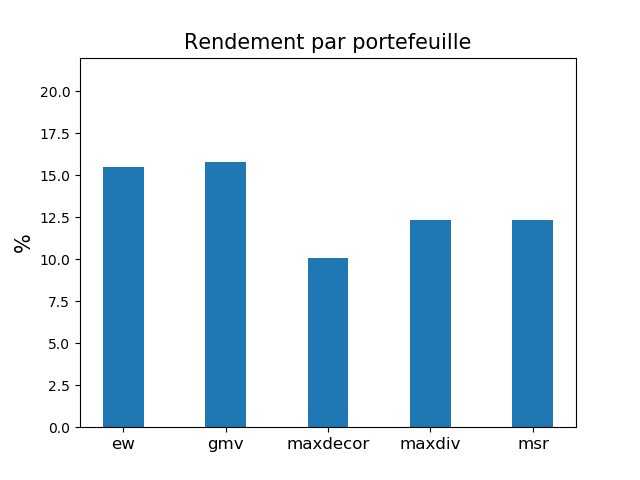

### Distribution des rendements hebdomadaires

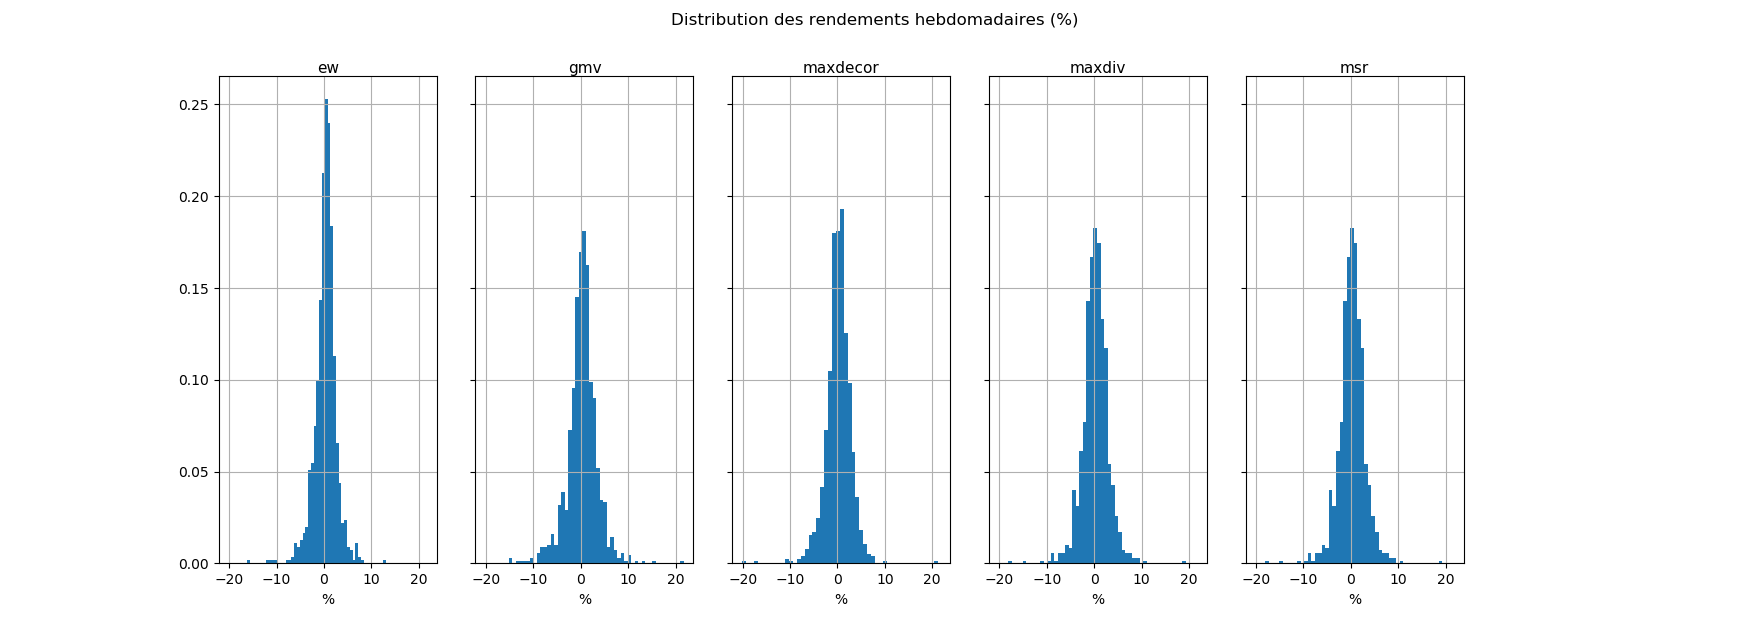

### Evolution dans le temps

## Ecart-Type du rendement

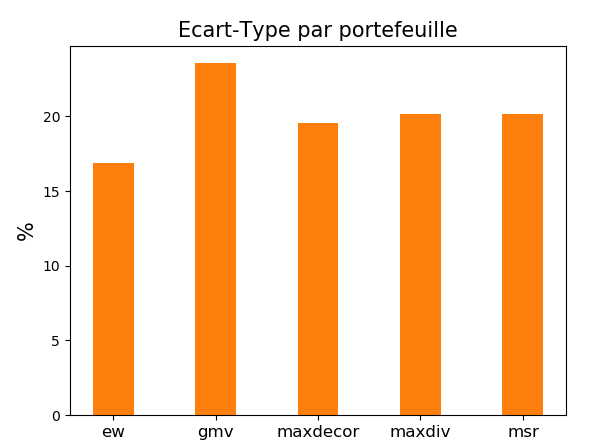

## Yearly Tracking Error

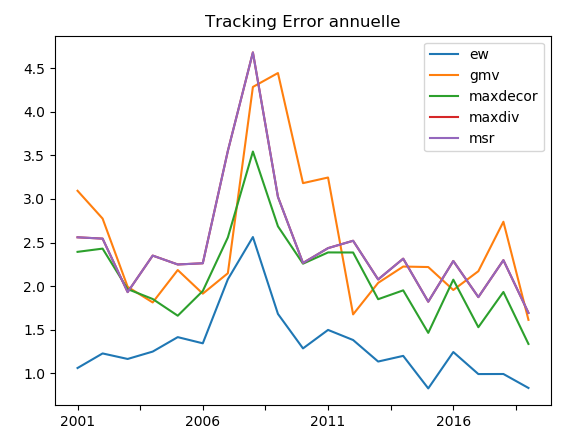

### Weekly Tracking Error

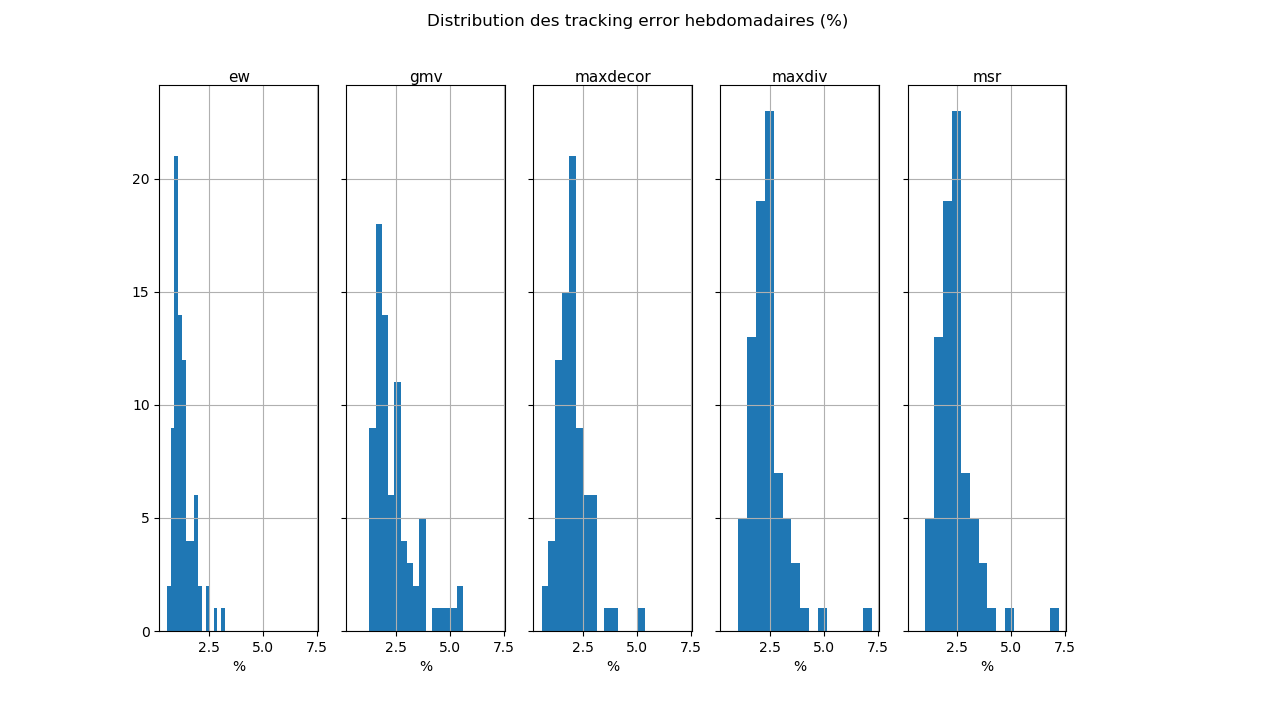

## Excess Return 

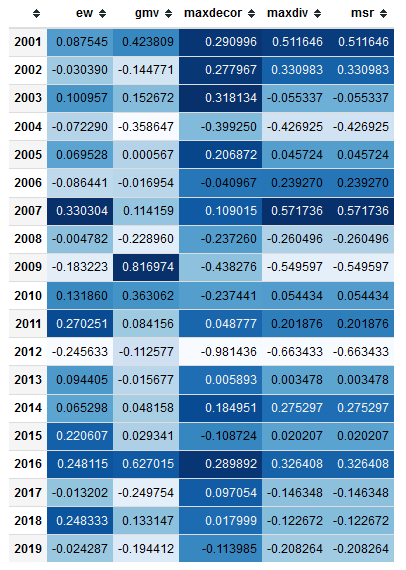

## EnC

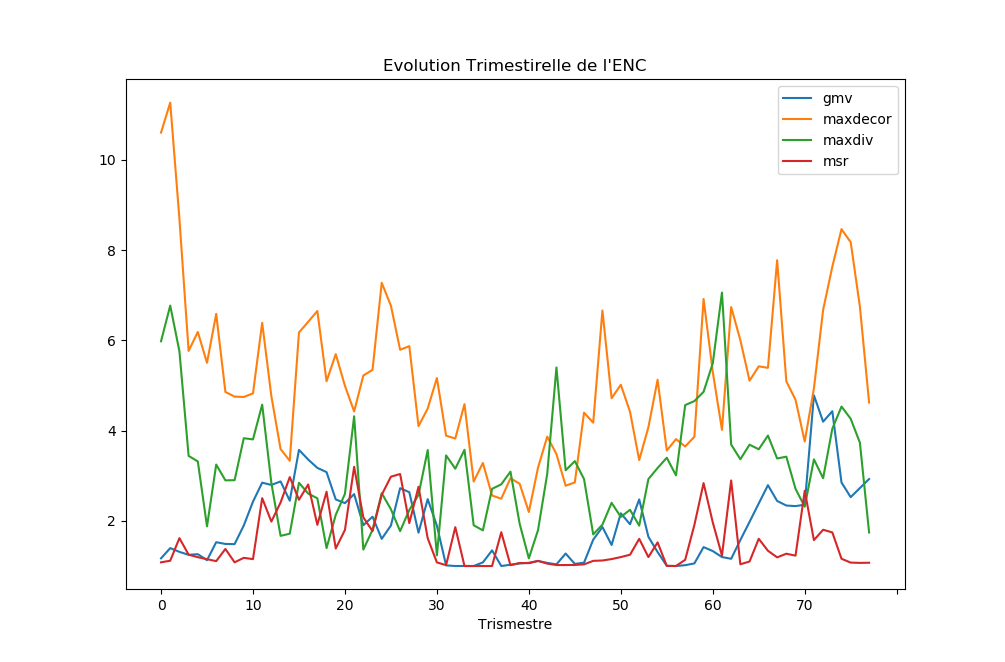

## Information Ratio

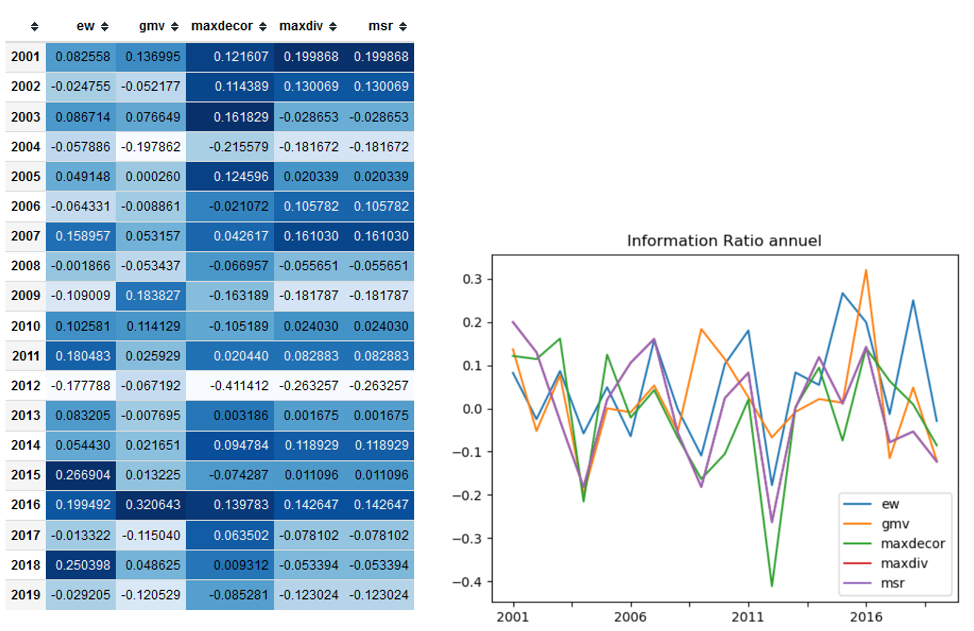

## Sharp Ratio

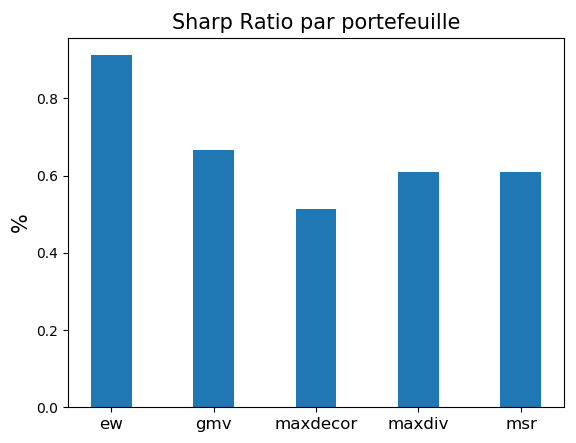

## Quelle importance donne chaque portefeuille à chaque titre

- Récupérer table de poids
- Calculer poids moyen sur les 20 ans
- Analyser les 3 plus gros poids pour les 5 portefeuilles

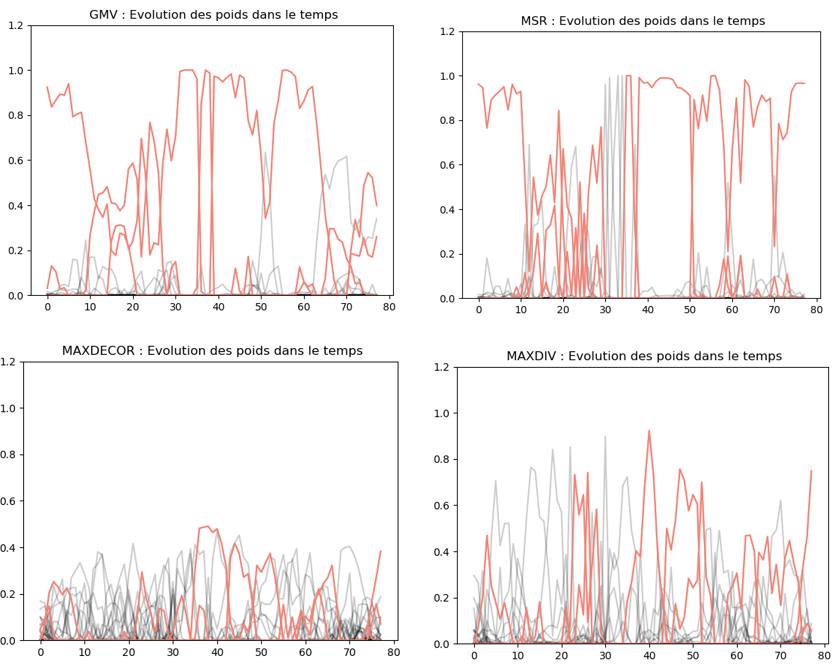

# Intégration des contraintes d'empreintes carbones

Nous proposons dans cette partie de pénaliser l'empreinte carbone dans l'objectif de chacun de nos portefeuilles étudiés dans la partie précédente. Des termes de pénalisation sont ajoutés en multipliant chacun des poids par l'empreinte carbone de l'actif correspondant. Nous proposons ici d'anlayser les indicateurs suivants:
- Rendement du portefeuille
- EnC


## GMV

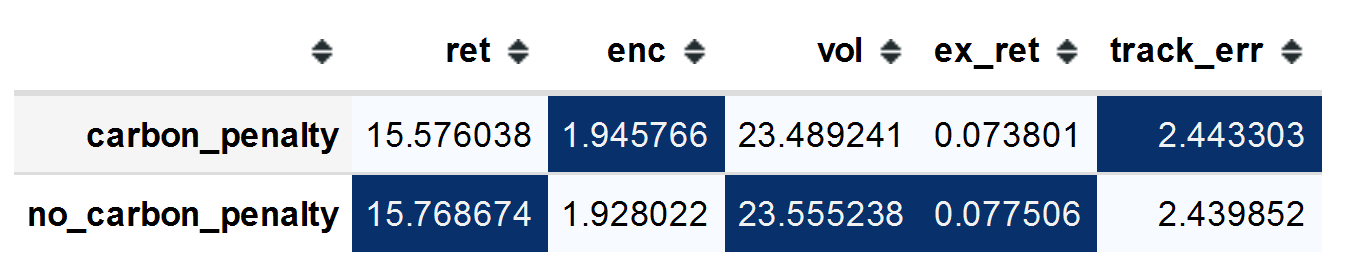

## MAXDECOR

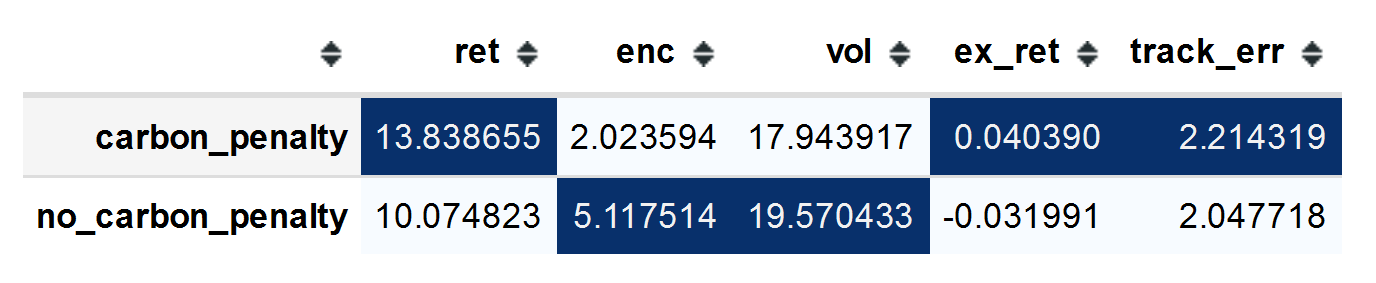

## MAXDIV

## MSR

# Conclusion